<div style="text-align: right"> <font color='Gray'> Sociofísica - 2023 </div>
<div style="text-align: right"> <font color='Gray'> Tarea N° XX </div>
<div style="text-align: right"> <font color='Gray'> Ignacio Ormazábal Inostroza </div>

    
***


## Modelo de Ising

Este modelo considera una red $d$-dimensional de $N$ sitios que pueden tener dos valores posibles: $s_k \in \{+1,-1\}$. La energia total de sistema se puede escribir como:

$$ E = - J \sum_{<ij>}  s_i s_j - h \sum_i s_i$$

donde $J$ es una constante de acoplamiento y $h$ es el campo magnetico por espin. De la interaccion entre vecinos, cada sitio o espin induce una alineacion con su vecino (direccion), la cual dependiendo del valor de $J$, la preferencia sera en paralelo ($J>0$) o antiparalelo ($J<0$) dando como resultado la descripcion de modelos ferromagneticos y antiferromagneticos.

Para estudiar la dinamica de este modelo, Glauber en 1963 introduce una tasa de transicion que permite el calculo analitico usando la ecuacion maestra. La idea es considerar que, para un sistema de espines que interactua sin campo magnetico externo, la probabilidad de encontrar el sistema con una configuracion determinada es $P(s_i , t)$ en un tiempo $t$. Luego

$$
\frac{\partial P(s_i , t)}{\partial t} = \sum_{i}[w(s_i' \to s_i)P(s_i',t) - w(s_i \to s_i')P(s_i, t)]
$$

donde la tasa de cambio esta dada por

$$
w(s_i \to s_i) = \frac{\alpha}{2} \left[1 - \frac{\gamma}{2} s_i (s_{i-1} + s_{i+1})\right]
$$

Notemos que las interacciones ferromagneticas se dan cuando $0<\gamma < 1$ y las antiferromagneticas cuando $-1 < \gamma < 0$. Utilizando el principio de balance detallado y la distribucion de Boltzmann se obtiene

$$
\gamma = \tanh(2 \beta J) ⇒ w(s_i \to s_i) = \frac{\alpha}{2} \left[1 - \frac{1}{2} s_i (s_{i-1} + s_{i+1})\right]\tanh(2 \beta J)
$$

## Algoritmo de Metropolis-Hastings

Para simular el comportamiento de este modelo, necesitamos calcular la probabilidad de transición $w(s \rightarrow s')$ de un estado $s$ al siguiente estado $s'$. Esto se puede escribir como el producto de la probabilidad de selección de un espin $g$ y una probabilidad de aceptación $A$ que describe la probabilidad de cambio de estadodel espin segun las condiuciones de su vecindario. Luego:

$$
w(s \rightarrow s') = g(s \rightarrow s')* A(s \rightarrow s')
$$

donde

1. Siguiendo la dinámica de Glauber, el algoritmo Monte Carlo se basa en movimientos locales. Con esto, la probabilidad de selección es uniforme y depende del numero de espines. Asi:

$$
g(s \rightarrow s') = 1/N^2
$$

2. La probabilidad de aceptación debe sigue la regla de Metropolis-Hasting, la cual se define como:

$$
A(s \rightarrow s') =
\begin{cases}
e^{ - \beta (E_{s'} - E_{s})}, \ \ \ \ \ si \ E_{s'} - E_{s}>0\\
1, \hspace{2.5cm} \text{otro caso}
\end{cases}
$$

Notemos que la idea de fondo en la probabilidad propuesta es minimizacion de la energia localmente. Por lo tanto, el espin cambiara de estado para minimizar la energia en su vecindario.

Luego, imponiendo la condición de balance detallado para las probabilidades de transición, simplemente se tiene:

$$ \dfrac{w(s \rightarrow s')}{w(s' \rightarrow s)} = \dfrac{A(s \rightarrow s')}{A(s' \rightarrow s)} = \dfrac{P(s')}{P(s)} = e^{ - \beta ( E_{s'} - E_{s})}$$

finalmente, simplificamos:

$$ \Delta E = E_{s'} - E_{s} = -(s_i' - s_i) \sum_{j \in V(i)} s_j = 2 s_i \sum_{j \in V(i)} s_j$$

# Simulacion

En la simulación se elige, por simplicidad, un medio ferromagnético uniforme ($J=1$) y ningún campo externo ($h=0$), ademas de $k_B = 1$. Asi, esta la energia se reduce a:

$$
E = - \sum_{<ij>} s_i s_j
$$

Finalmente establecemos las condiciones de contorno periódicas, de modo que todos los espines tengan el mismo número de vecinos.

**INICIO**


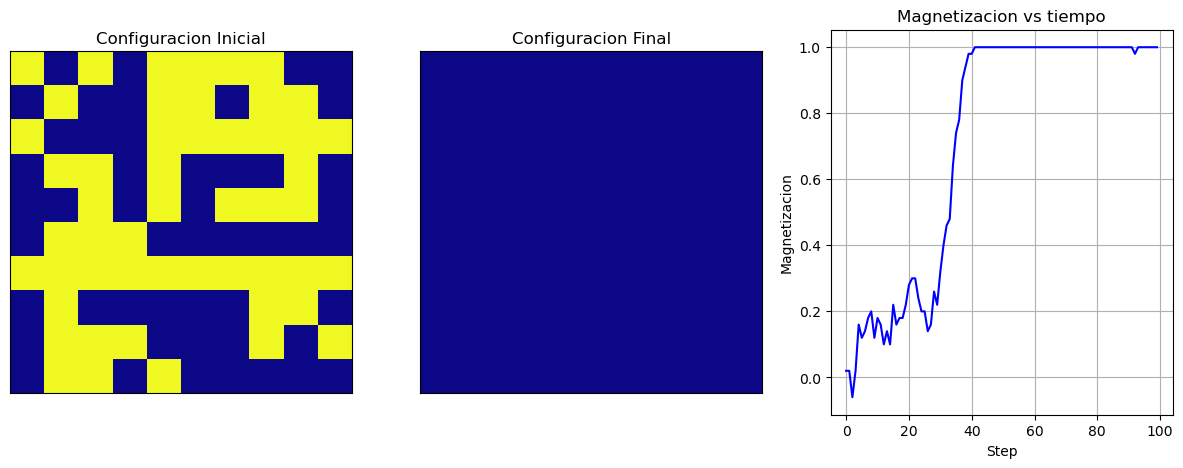

Tiempo ocupado (h:m:s:ns): 0:00:00.643661
**FIN**


In [1]:
# Modelo de Ising con dinamica de Glauber
# 06-Junio-2023
#===================================================================
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
#-------------------------------------------------------------------
print('**INICIO**')
print('==========')
# Inicio contador temporal del programa
tini = datetime.now()
#-------------------------------------------------------------------
# Condiciones iniciales
N=10
steps = 100
beta = 1
curr_state = np.random.choice(np.array([-1,1]),size=(N,N))
#-----------------------------------------------
# Configuracion Figura
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))

# Figura Estado Inicial
ax1.matshow(curr_state, cmap = plt.cm.plasma)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("Configuracion Inicial")
#-----------------------------------------------
# Dinamica
M = np.zeros(steps)

for i in range(steps):
   M[i] = np.sum(curr_state)

   # Evaluacion por espin
   for n in range(N**2):
      # elige un espin en la posicion (i,j) aleatoriamente
      i, j = np.random.randint(N), np.random.randint(N)
      # Suma de estados en el vecindario de von neumann. Obs: el modulo % se usa para considerar las condiciones de borde
      nn = curr_state[(i-1)%N, j] + curr_state[(i+1)%N, j] + curr_state[i, (j-1)%N] + curr_state[i, (j+1)%N]
      # Calcula un delta de energia con el vecindario (nn)
      delta = 2 * curr_state[i,j] * nn
      # Algoritmo de Metropolis: compara con numero aleatorio cuando cambiar de estado
      if delta < 0 or np.random.random() < np.exp(- beta * delta):
        curr_state[i,j] = -1. * curr_state[i,j]

#-----------------------------------------------
# Figura Estado Final
ax2.matshow(curr_state, cmap = plt.cm.plasma)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Configuracion Final")
#-----------------------------------------------
# Figura Magnetizacion
ax3.plot(M/N**2,'-b')
ax3.set_xlabel("Step")
ax3.set_ylabel("Magnetizacion")
ax3.set_title("Magnetizacion vs tiempo")
ax3.grid(True)
#-----------------------
plt.show()
#===============================================================================================
# Fin contador temporal del programa
tfin = datetime.now()
dtie = tfin - tini
print('Tiempo ocupado (h:m:s:ns):', dtie)
#-----------------------------------------------
print('========')
print('**FIN**')

# **Extra** - [Fuera del formato de tarea]

## Simulacion de la transicion de fase: Magnetizacion vs Temperatura

Usaremos una version optimizada con Numba y usando funciones para poder hacer esta simulacion, debido a que requere ejecutar varias veces el programa.

Los autores de esta simulacion son:

* Giacomo Barzon
* Francesco Fontana
* Lorenzo Mancini
* Giulio Vicentini

La pueden encontrar aqui: https://github.com/lorenzomancini1/IsingModel2D_MonteCarlo

In [2]:
#===================================================================
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime     # Importamos uso de tiempo
#import math
from numba import jit, prange
from tqdm.auto import tqdm
#-------------------------------------------------------------------
print('**INICIO**')
print('==========')
# Inicio contador temporal del programa
tini = datetime.now()
#-------------------------------------------------------------------
# Funciones
@jit(nopython=True)
def init_state(N):
  '''
  Return a random spin configuration in a 2d square lattice
  '''
  return np.random.choice(np.array([-1,1]),size=(N,N))
#---
@jit(nopython=True)
def glauber(state, beta):
  '''
  Spin-flip according to Metropolis-Hastings algorithm
  '''
  N = state.shape[0]
  for n in prange(N**2):
      # elige un espin en la posicion (i,j) aleatoriamente
      i, j = np.random.randint(N), np.random.randint(N)
      # gSuma de estados en el vecindario de von neumann. Obs: el modulo % se usa para considerar las condiciones de borde
      nn = state[(i-1)%N, j] + state[(i+1)%N, j] + state[i, (j-1)%N] + state[i, (j+1)%N]
      # Calcula un delta de energia
      delta = 2 * state[i,j] * nn
      # Algoritmo de Metropolis: compara con numero aleatorio cuando cambiar de estado
      if delta < 0 or np.random.random() < np.exp(- beta * delta):
        state[i,j] = -1. * state[i,j]
  return state
#---
@jit(nopython=True)
def energy(state):
  '''
  Energy of a given configuration
  '''
  N = state.shape[0]
  energy = 0

  # Loop over all sites
  for i in prange(N):
    for j in prange(N):

      # get nearest neighbours states
      nn = state[(i-1)%N, j] + state[(i+1)%N, j] + state[i, (j-1)%N] + state[i, (j+1)%N]
      # compute site energy
      energy -=  state[i,j] * nn

  # Divide energy by 2, since we count each site contribution to each of the 2 neighbours
  return energy / 2


#---
def Ising(N, beta, eq_steps = int(1e4), steps = int(1e6), order = False, annealing = False, cluster = False, verbose=True):
    '''
    Run a simulation of a 2d Ising model

    Parameters:
    - N: number of sites per dimension
    - beta
    - eq_steps: initial steps for the equilibration phase
    - steps: effective steps of the simulation
    - order: generate a ordered configuration with uniform magnetisation
    - annealing: using simulating annealing during equilibration
    - cluster: to use the Wolff algorithm
    - verbose: more detailed output during simulation

    Output:
    - E_mean: Mean energy
    - M_mean: Mean magnetization
    - Cs: Specific heat
    - Chis: Susceptibility
    - E_var: Energy error
    - M_var: Magnetisation error
    - E_eq: Energy on equilibration
    - M_eq: Magnetisation on equilibration
    - E: Energy on simulation
    - M Magnetisation on simulation

    '''

    if verbose:
        print('---------- ISING MODEL ----------')
        print('N:', N, ', beta:', beta, ', cluster:', cluster, ', annealing:', annealing , '\n')

        print('Start equilibration...')

  # Init state
    if order:
        curr_state = np.ones((N,N))
    else:
        curr_state = init_state(N)

    E_eq = np.zeros(eq_steps)
    M_eq = np.zeros(eq_steps)

    if annealing:
        ### Equilibation with SA
        betas = np.zeros(eq_steps)
        N_annealing = eq_steps-eq_steps//10
        betas[:N_annealing] = np.linspace(0.1, beta, num=N_annealing, endpoint=True)
        betas[N_annealing:] = beta
    else:
    ### Equilibration
        betas = np.zeros(eq_steps) + beta

  # Loop over time steps
    if verbose:
        for i in tqdm(range(eq_steps)):
            #keep trace of energy and magnetisation
            E_eq[i] = energy(curr_state)
            M_eq[i] = np.sum(curr_state)
            #update the state
            if cluster:
                curr_state = wolff(curr_state, betas[i])
            else:
                curr_state = glauber(curr_state, betas[i])

        print('End equilibration...\n')

    else:
        for i in range(eq_steps):
            #keep trace of energy and magnetisation
            E_eq[i] = energy(curr_state)
            M_eq[i] = np.sum(curr_state)
            #update the state
            if cluster:
                curr_state = wolff(curr_state, betas[i])
            else:
                curr_state = glauber(curr_state, betas[i])

  ### Simulation
    if verbose:
        print('Start simulation...')

  # Define arrays for storing state observables
    E = np.zeros(steps)
    M = np.zeros(steps)

    if verbose:
        for i in tqdm(range(steps)):
            #keep trace of energy and magnetisation
            E[i] = energy(curr_state)
            M[i] = np.sum(curr_state)
            # Evolve state
            if cluster:
                curr_state = wolff(curr_state, beta)
            else:
                curr_state = glauber(curr_state, beta)
        print('End simulation...')

    else:
        for i in range(steps):
          #keep trace of energy and magnetisation
            E[i] = energy(curr_state)
            M[i] = np.sum(curr_state)
          # Evolve state
            if cluster:
                curr_state = wolff(curr_state, beta)
            else:
                curr_state = glauber(curr_state, beta)

    ### Compute observables
    E_mean, M_mean, C, Chi = np.mean(E), np.mean(M), beta**2*np.std(E)**2, beta*np.std(M)**2
    E_var, M_var = np.std(E), np.std(M)

  ### Return results
    return (E_mean, M_mean, C, Chi,
            E_var, M_var,
            E_eq, M_eq, E, M)
#-----------------------------------------------
### ------Computing the simulation changing beta and the lattice size
N_T = 40
Ts = np.linspace(0.75, 3.75, endpoint=True, num=N_T)
betas = 1 / Ts

Ns = [10,20,30,40]#,50]
N_N = len(Ns)
eq_steps = int(1e4)
steps = int(1e4)

Es = np.zeros((N_N, N_T))
Ms = np.zeros((N_N, N_T))
Cs = np.zeros((N_N, N_T))
Chis = np.zeros((N_N, N_T))

for i,N in enumerate(Ns):
  print('Simulating N={}'.format(N))
  for j, beta in enumerate(tqdm(betas)):
    #print('\t{}/{}  beta: {}'.format(j,N_T,beta))
    E_mean, M_mean, C_mean, Chi_mean, E_var, M_var, E_eq, M_eq, E, M,  = Ising( N, beta, eq_steps=eq_steps, steps=steps, annealing=False, cluster=False,verbose=False  )

    Es[i,j] = E_mean
    Ms[i,j] = M_mean
    Cs[i,j] = C_mean
    Chis[i,j] = Chi_mean

**INICIO**
Simulating N=10


  0%|          | 0/40 [00:00<?, ?it/s]

Simulating N=20


  0%|          | 0/40 [00:00<?, ?it/s]

Simulating N=30


  0%|          | 0/40 [00:00<?, ?it/s]

Simulating N=40


  0%|          | 0/40 [00:00<?, ?it/s]

In [3]:
def plot_values (Es,Ms,Cs,Chis,N,startN=0,endN=Es.shape[0]-1):
    titles=['Energy','Magnetisation','Specific Heat','Susceptibility']
    #labels = ['e', 'm', 'c', 'chi']
    physical_quantities=[Es,np.abs(Ms),Cs,Chis]
    plt.figure(figsize=(16,10))
    for i in range(len(physical_quantities)):
        ax=plt.subplot(2,2,i+1)
        ax.set_xlabel('Temperature', fontsize=18)
        ax.set_ylabel(titles[i], fontsize=18)
        ax.set_title(titles[i], fontsize = 20, fontweight = "bold" )
        ax.grid('--', alpha= 0.7)
        for j in range(startN,endN+1):
            ax.plot(Ts[1:], physical_quantities[i][j][1:] / N[j]**2, '.',markersize=9, label='N='+str(N[j]), alpha=0.7)

            ax.legend()

    plt.subplots_adjust(hspace=0.3)

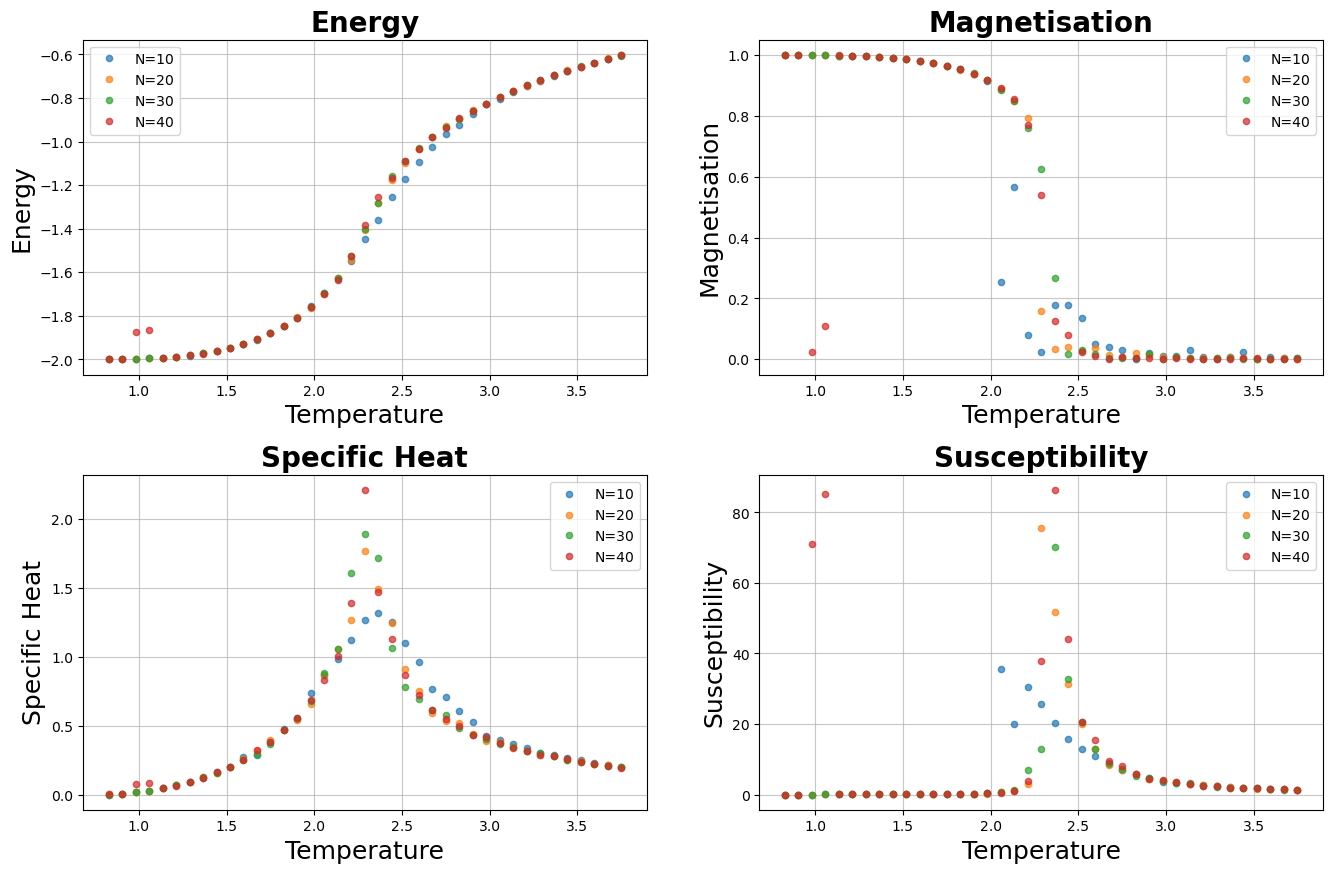

In [4]:
plot_values(Es,Ms,Cs,Chis,Ns,startN=0)